# Bootcamp <span style="color:#8D35FF">2023</span> - <span style="color:#8D35FF">klasyfikacja</span>

In [250]:
import statsmodels.api as sm
import pandas as pd

spam = sm.datasets.get_rdataset("spam7", "DAAG", cache=True).data
df = pd.DataFrame(spam)

## Spam E-mail Data

### Opis

Dane składają się z 4601 wiadomości e-mail, z których 1813 zostało zidentyfikowanych jako spam. Jest to podzbiór pełnego zbioru danych, zawierający tylko sześć z 57 zmiennych objaśniających znajdujących się pełnym zbiorze danych.


<https://rdrr.io/cran/DAAG/man/spam7.html>


In [251]:
df.head()

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.000,0.778,0.00,0.00,0.00,y
1,1028,0.180,0.372,0.43,0.43,0.21,y
2,2259,0.184,0.276,0.06,1.16,0.06,y
3,191,0.000,0.137,0.00,0.00,0.00,y
4,191,0.000,0.135,0.00,0.00,0.00,y


##### Format
Columns included are:
<dl>
<dt>crl.tot</dt>
<dd>total length of uninterrupted sequences of capitals</dd>
<dt>dollar</dt>
<dd>Occurrences of the dollar sign, as percent of total number of characters</dd>
<dt>bang</dt>
<dd>Occurrences of ‘!’, as percent of total number of characters</dd>
<dt>money</dt>
<dd>Occurrences of ‘money’, as percent of total number of words</dd>
<dt>n000</dt>
<dd>Occurrences of the string ‘000’, as percent of total number of words</dd>
<dt>make</dt>
<dd>Occurrences of ‘make’, as a percent of total number of words</dd>
<dt>yesno</dt>
<dd>outcome variable, a factor with levels `n` not spam, `y` spam</dd>

In [252]:
df.head()

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.000,0.778,0.00,0.00,0.00,y
1,1028,0.180,0.372,0.43,0.43,0.21,y
2,2259,0.184,0.276,0.06,1.16,0.06,y
3,191,0.000,0.137,0.00,0.00,0.00,y
4,191,0.000,0.135,0.00,0.00,0.00,y


In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crl.tot  4601 non-null   int64  
 1   dollar   4601 non-null   float64
 2   bang     4601 non-null   float64
 3   money    4601 non-null   float64
 4   n000     4601 non-null   float64
 5   make     4601 non-null   float64
 6   yesno    4601 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 251.7+ KB


In [254]:
df.describe().round(2)

,crl.tot,dollar,bang,money,n000,make
count,4601.00,4601.00,4601.00,4601.00,4601.00,4601.00
mean,283.29,0.08,0.27,0.09,0.10,0.10
std,606.35,0.25,0.82,0.44,0.35,0.31
min,1.00,0.00,0.00,0.00,0.00,0.00
25%,35.00,0.00,0.00,0.00,0.00,0.00
50%,95.00,0.00,0.00,0.00,0.00,0.00
75%,266.00,0.05,0.32,0.00,0.00,0.00
max,15841.00,6.00,32.48,12.50,5.45,4.54


### Czyszczenie zbioru danych

Zmiana kolumny `yesno` w zmienną binarną, czyli tak aby zamiast `y` i `n` przyjomwała wartości `1` i `0` (dla wygody zmieniliśmy również nazwę na `spam`)

In [255]:
df.rename(columns = {'yesno':'spam'}, inplace = True)
df.spam = df.spam.eq('y').mul(1)

In [256]:
df.head()

,crl.tot,dollar,bang,money,n000,make,spam
0,278,0.000,0.778,0.00,0.00,0.00,1
1,1028,0.180,0.372,0.43,0.43,0.21,1
2,2259,0.184,0.276,0.06,1.16,0.06,1
3,191,0.000,0.137,0.00,0.00,0.00,1
4,191,0.000,0.135,0.00,0.00,0.00,1


In [257]:
df.describe().round(2)

,crl.tot,dollar,bang,money,n000,make,spam
count,4601.00,4601.00,4601.00,4601.00,4601.00,4601.00,4601.00
mean,283.29,0.08,0.27,0.09,0.10,0.10,0.39
std,606.35,0.25,0.82,0.44,0.35,0.31,0.49
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,35.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,95.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,266.00,0.05,0.32,0.00,0.00,0.00,1.00
max,15841.00,6.00,32.48,12.50,5.45,4.54,1.00


<AxesSubplot: >

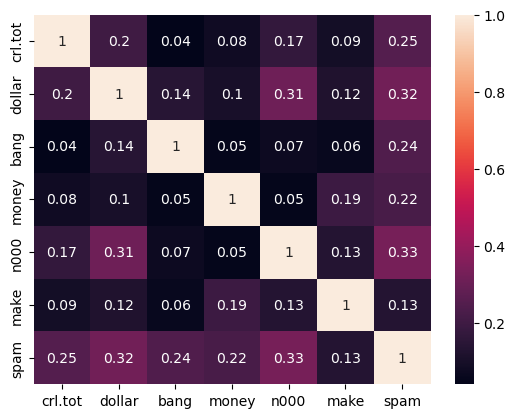

In [258]:
import seaborn as sns

sns.heatmap(df.corr().round(2), annot=True)

<!-- zbalansowanie -->

In [259]:
{'no': df['spam'].tolist().count(0), 'yes': df['spam'].tolist().count(1), 'n/y': round(df['spam'].tolist().count(0)/df['spam'].tolist().count(1),2), 'y/n': round(df['spam'].tolist().count(1)/df['spam'].tolist().count(0),2), 'n%': round(df['spam'].tolist().count(0)/len(df['spam'].tolist()),2), 'y%': round(df['spam'].tolist().count(1)/len(df['spam'].tolist()),2)}

{'no': 2788, 'yes': 1813, 'n/y': 1.54, 'y/n': 0.65, 'n%': 0.61, 'y%': 0.39}

<AxesSubplot: >

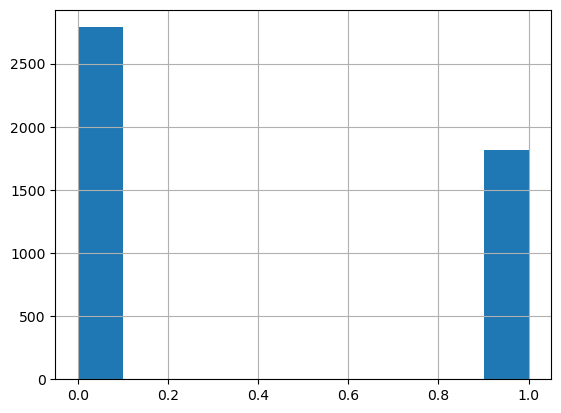

In [260]:
df.spam.hist()

In [261]:
target = 'spam'
predictors = [col for col in df.columns.to_list() if col != target]

Wykresy <span style="color:#8D35FF">ramka-wąsy</span> (*ang. <span style="color:#8D35FF">boxplot</span>*)

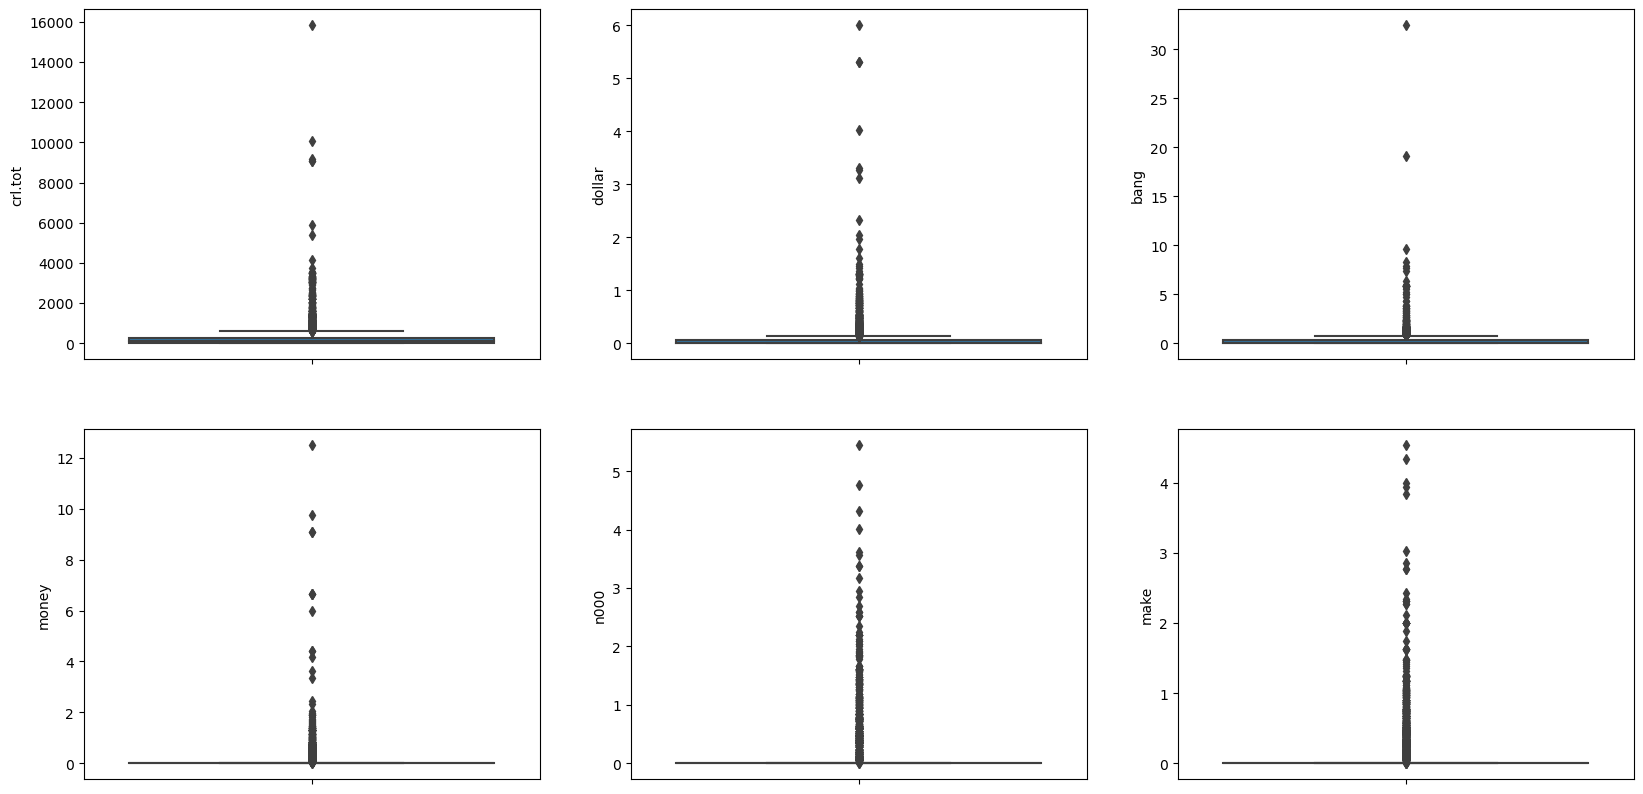

In [262]:
import matplotlib.pyplot as plt

def boxplots(df, p):
    fig, axis = plt.subplots(2, 3, figsize=[20, 10])
    idx=0;
    axis=axis.flatten()
    for predictor in p:
        sns.boxplot(y=predictor, data=df[[predictor]], ax=axis[idx])
        idx+=1
            
    # plt.tight_layout()
    plt.show()

boxplots(df,predictors)

#### Obserwacje odstające

In [263]:
df2 = df
for col in predictors:
    mean = df2[col].mean()
    sd = df2[col].std()
    df2 = df2[(df2[col] <= mean+(2*sd))]

In [264]:
df2.describe().round(2)

,crl.tot,dollar,bang,money,n000,make,spam
count,3865.00,3865.00,3865.00,3865.00,3865.00,3865.00,3865.00
mean,197.37,0.03,0.18,0.04,0.03,0.04,0.33
std,280.40,0.08,0.33,0.13,0.10,0.11,0.47
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,30.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,86.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,226.00,0.00,0.23,0.00,0.00,0.00,1.00
max,1481.00,0.52,1.81,0.87,0.66,0.66,1.00


<AxesSubplot: >

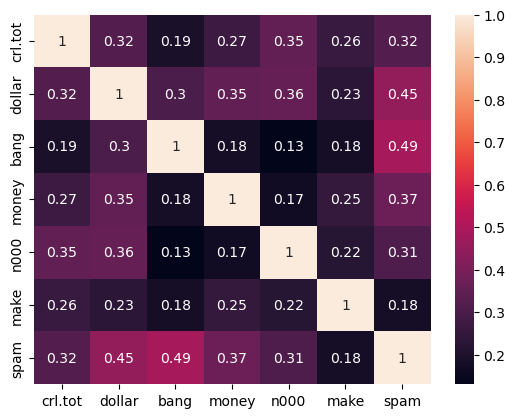

In [265]:
sns.heatmap(df2.corr().round(2), annot=True)

In [266]:
{'no': df2['spam'].tolist().count(0), 'yes': df2['spam'].tolist().count(1), 'n/y': round(df2['spam'].tolist().count(0)/df2['spam'].tolist().count(1),2), 'y/n': round(df2['spam'].tolist().count(1)/df2['spam'].tolist().count(0),2), 'n%': round(df2['spam'].tolist().count(0)/len(df2['spam'].tolist()),2), 'y%': round(df2['spam'].tolist().count(1)/len(df2['spam'].tolist()),2)}

{'no': 2607, 'yes': 1258, 'n/y': 2.07, 'y/n': 0.48, 'n%': 0.67, 'y%': 0.33}

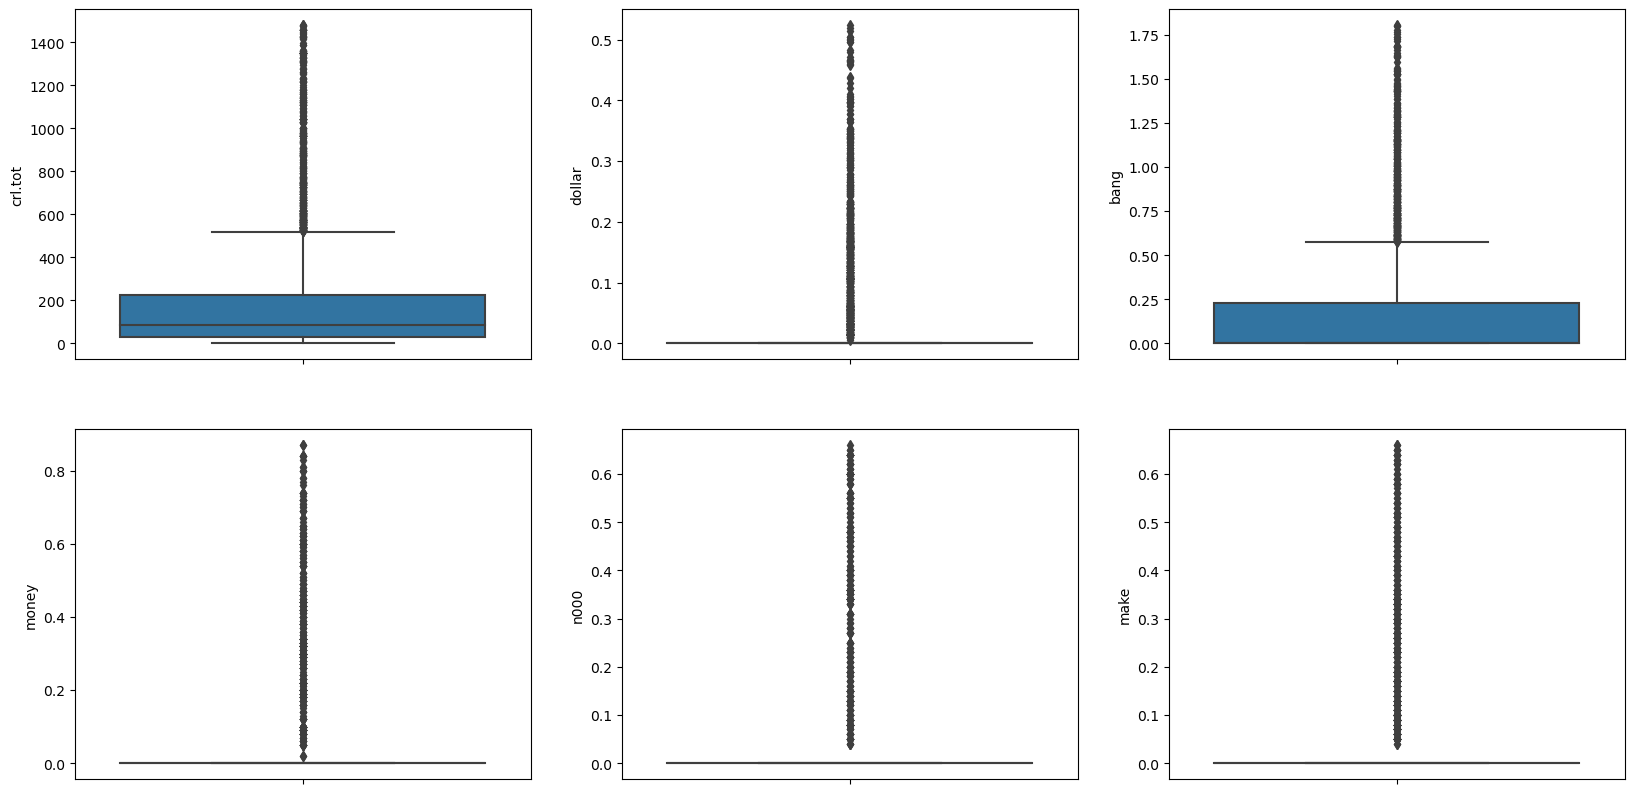

In [267]:
boxplots(df2,predictors)

### Klasyfikacja

#### Podział zbioru

In [268]:
from sklearn.model_selection import train_test_split

df2_train, df2_test = train_test_split(df2, test_size = 0.15, random_state=7)

#### Standaryzacja predyktorów

In [269]:
from sklearn.preprocessing import StandardScaler

scaler2 = StandardScaler().fit(df2_train[predictors])


train2_std = scaler.transform(df2_train[predictors])

df2_train_std = pd.DataFrame(train_std, index=df_train.index, columns=predictors)
df2_train_std.insert(loc=0, column = target, value = df2_train[target])


test2_std = scaler.transform(df_test[predictors])

df2_test_std = pd.DataFrame(test2_std, index=df_test.index, columns=predictors)
df2_test_std.insert(loc=0, column = target, value = df2_test[target])

#### Regresja logistyczna

In [270]:
from sklearn.linear_model import LogisticRegression

LogR = LogisticRegression(random_state=7).fit(df2_train_std[predictors], df2_train_std[target])

Predykcja

In [271]:
pred_LR = LogR.predict(df2_test_std[predictors])

##### Confusion matrix

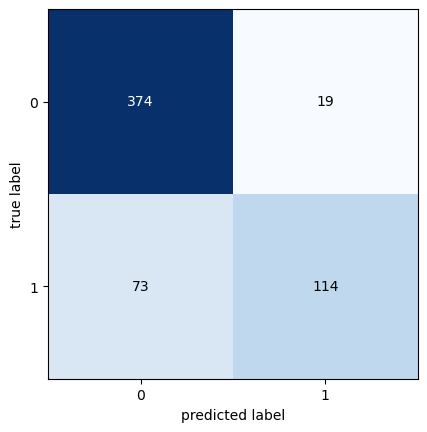

In [272]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

conf_mat = confusion_matrix(y_true = df2_test_std[target], y_pred= pred_LR)
fig, ax = plot_confusion_matrix(conf_mat=conf_mat)
plt.show()

##### Metryki

In [284]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc, accuracy_score

def metryki(df_target,predict,class_probabilities):
    print(f"Accuracy Score: {accuracy_score(df_target, predict).round(3)}")
    print(f"Precision Score: {precision_score(df_target, predict).round(3)}")
    print(f"Recall Score: {recall_score(df_target, predict).round(3)}")
    print(f"F1 Score: {f1_score(df_target, predict).round(3)}")

    preds = class_probabilities[:, 1]
    fpr, tpr, threshold = roc_curve(df_target, preds)
    roc_auc = auc(fpr, tpr)
    print(f"AUC: {roc_auc.round(3)}")

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

Accuracy Score: 0.841
Precision Score: 0.857
Recall Score: 0.61
F1 Score: 0.713
AUC: 0.891


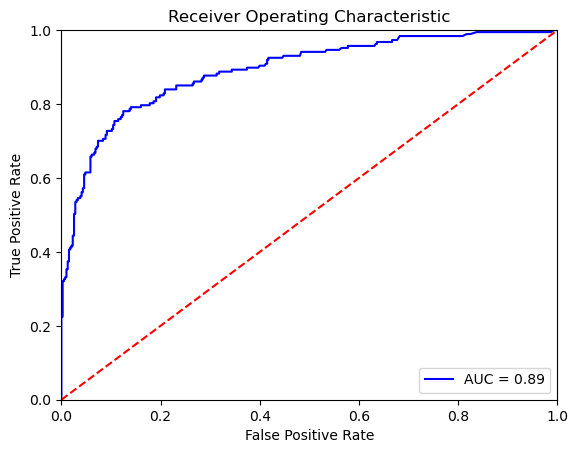

In [287]:
probs_LR = LogR.predict_proba(df2_test_std[predictors])
metryki(df2_test_std[target], pred_LR, probs_LR)

### Drzewo decyzyjne

In [290]:
from sklearn import tree

DT = tree.DecisionTreeClassifier(random_state=7).fit(df2_train_std[predictors], df2_train_std[target])

In [291]:
pred_DT = DT.predict(df2_test_std[predictors])

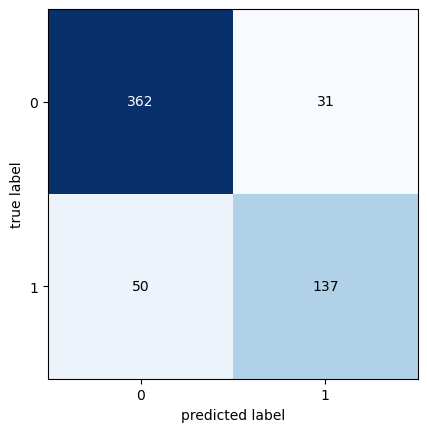

In [292]:
conf_mat = confusion_matrix(y_true = df2_test_std[target], y_pred= pred_DT)
fig, ax = plot_confusion_matrix(conf_mat=conf_mat)
plt.show()

Accuracy Score: 0.86
Precision Score: 0.815
Recall Score: 0.733
F1 Score: 0.772
AUC: 0.807


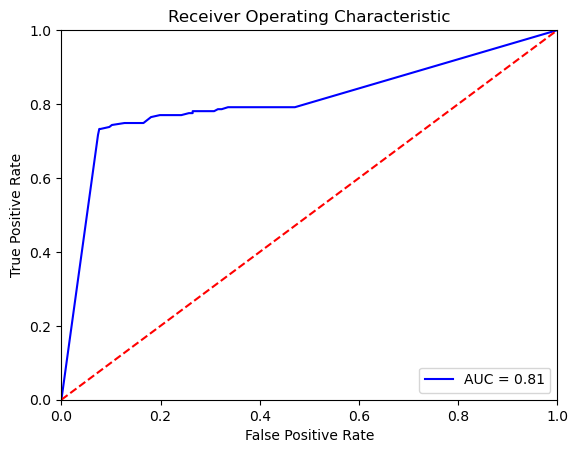

In [293]:
probs_DT = DT.predict_proba(df2_test_std[predictors])
metryki(df2_test_std[target], pred_DT, probs_DT)

### Las losowy

In [294]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state=7).fit(df2_train_std[predictors], df2_train_std[target])

In [295]:
pred_RF = RF.predict(df2_test_std[predictors])

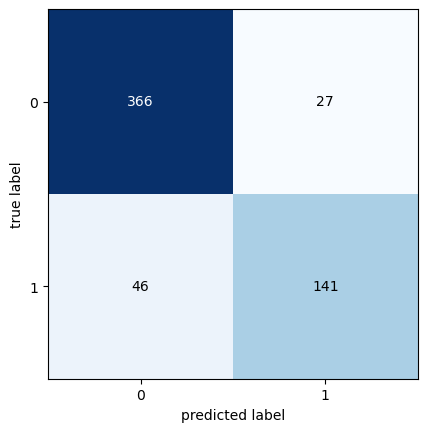

In [296]:
conf_mat = confusion_matrix(y_true = df2_test_std[target], y_pred= pred_RF)
fig, ax = plot_confusion_matrix(conf_mat=conf_mat)
plt.show()

Accuracy Score: 0.874
Precision Score: 0.839
Recall Score: 0.754
F1 Score: 0.794
AUC: 0.905


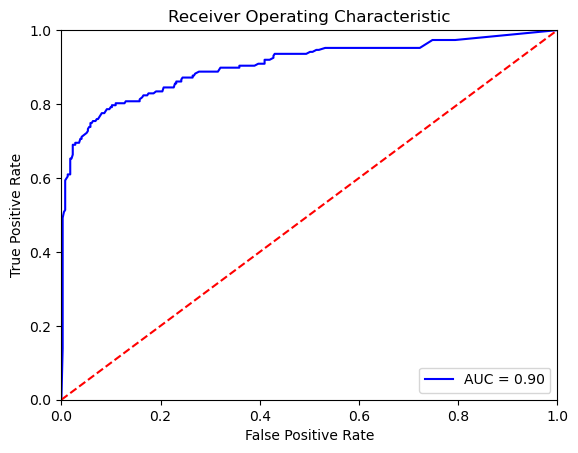

In [297]:
probs_RF = RF.predict_proba(df2_test_std[predictors])
metryki(df2_test_std[target], pred_RF, probs_RF)